# Topic Modeling w/ TF-IDF Vectorization

The purpose of this notebook is to utilize TF-IDF vectorization in topic modeling, using the new_df dataframe built in final_dataframe_cleanup.ipynb.

Importing packages:

In [1]:
import nltk
from nltk.corpus import stopwords
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 20,10

Picking in Data:

In [2]:
with open('Data/cleaned_string_df.pickle','rb') as read_file:
    new_df = pickle.load(read_file)

In [3]:
new_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...
2,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Governor Clinton, a one minute response.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,3,n/a,one minute response
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...
4,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: President Bush, one minute response, sir.",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,4,n/a,one minute response sir


# TF-IDF Vectorizer

For the next round of topic modeling, I will be using TF-IDF vectorizer, to compare the results.

In [331]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [332]:
stop = ['presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute']

In [333]:
vectorizer = TfidfVectorizer(stop_words=stop)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [341]:
X = new_df[new_df.line_length >= 25]['string']
tfi_model = vectorizer.fit_transform(X)

In [342]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [343]:
tf_term_document_matrix.shape

(15690, 17566)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [344]:
nmf_model = NMF(6)

Topics from the relating model, for each line:

In [345]:
tf_doc_topic = nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(15690, 6)

Pulling the top 15 words for each of the k topics:

In [346]:
tf_words = vectorizer.get_feature_names()
tf = nmf_model.components_.argsort(axis=1)[:,-1:-16:-1]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['people', 'going', 'get', 'know', 'think', 'job', 'got', 'one', 'work', 'time', 'thing', 'say', 'back', 'right', 'way']


Topic 2:
['tax', 'cut', 'percent', 'income', 'pay', 'plan', 'rate', 'middle', 'business', 'billion', 'spending', 'increase', 'budget', 'class', 'code']


Topic 3:
['health', 'care', 'insurance', 'plan', 'cost', 'medicare', 'company', 'system', 'universal', 'people', 'affordable', 'get', 'drug', 'million', 'coverage']


Topic 4:
['would', 'think', 'say', 'law', 'one', 'court', 'like', 'could', 'federal', 'abortion', 'first', 'right', 'bill', 'well', 'support']


Topic 5:
['school', 'child', 'education', 'need', 'kid', 'teacher', 'parent', 'college', 'public', 'family', 'make', 'every', 'student', 'sure', 'choice']


Topic 6:
['state', 'united', 'world', 'war', 'need', 'military', 'iraq', 'america', 'nuclear', 'iran', 'policy', 'nation', 'weapon', 'troop', 'foreign']




In [347]:
tf.shape

(6, 15)

Based on this, the 5 topics seem to be about the following: 
1. War/Foreign Policy
2. Economy/Taxes
3. Healthcare
4. Education
5. Random Bucket - Campaign Speech

### Word Cloud Visualization:

Here, I'll be creating some word cloud visualizations for these topics.

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
full_text = ' '.join(X)

In [ ]:
tf_topic_words[0]

In [ ]:
topic_1_text = ' '.join(tf_topic_words[0])
topic_2_text = ' '.join(tf_topic_words[1])
topic_3_text = ' '.join(tf_topic_words[2])
topic_4_text = ' '.join(tf_topic_words[3])
topic_5_text = ' '.join(tf_topic_words[4])

w/ help from this tutorial: https://www.datacamp.com/community/tutorials/wordcloud-python

Topic 1:

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(topic_1_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 2:

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=15, background_color="white").generate(topic_2_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 3:

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_3_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 4:

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_4_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Topic 5:

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(topic_5_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Making a "cooler" image:

In [32]:
from PIL import Image

In [33]:
pwd

'/Users/patrickbovard/Documents/GitHub/presidential_debate_analysis'

In [34]:
school_mask = np.array(Image.open("school.png"))

In [35]:
school_mask

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [35, 35, 35, ..., 35, 35, 35],
       [35, 35, 35, ..., 35, 35, 35],
       [36, 36, 36, ..., 36, 36, 36]], dtype=uint8)

In [36]:
def transform_format(val):
    if val ==0:
        return 255
    else:
        return val

In [37]:
transformed_school_mask = np.ndarray((school_mask.shape[0],school_mask.shape[1]), np.int32)

In [38]:
for i in range(len(school_mask)):
    transformed_school_mask[i] = list(map(transform_format, school_mask[i]))

In [39]:
transformed_school_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [ 35,  35,  35, ...,  35,  35,  35],
       [ 35,  35,  35, ...,  35,  35,  35],
       [ 36,  36,  36, ...,  36,  36,  36]], dtype=int32)

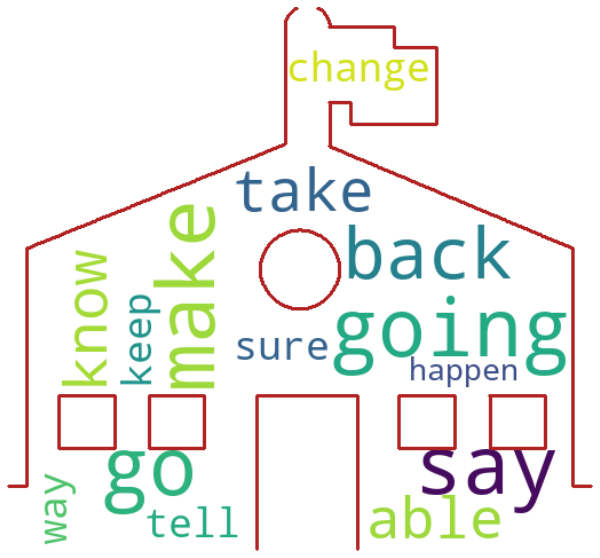

In [40]:
wc = WordCloud(background_color="white", max_words=15, mask=transformed_school_mask, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(topic_5_text)
# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Topic Assignment Per Document

Here, I'll be adding topics to a document from the NMF document-topic matrix:

Pulling the document-topic matrix:

In [41]:
tf_doc_topic

array([[3.28202312e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.17525069e-05, 0.00000000e+00, 0.00000000e+00],
       [1.23243773e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 7.92913032e-03, 7.38444700e-02],
       [1.42784094e-02, 1.91072643e-02, 0.00000000e+00, ...,
        0.00000000e+00, 4.56327440e-04, 2.92507520e-02],
       ...,
       [3.15373315e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.26117623e-02, 0.00000000e+00, 2.68835411e-03, ...,
        1.20642578e-02, 0.00000000e+00, 1.23596975e-03],
       [1.13713123e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.44148098e-04, 0.00000000e+00]])

In [42]:
tf_doc_topic[0][2]

0.0

Mapping these out onto the individual documents;

In [43]:
topic_df = new_df[new_df.line_length >= 40].copy()

In [44]:
topic_df['Topic_1'] = 0
topic_df['Topic_2'] = 0
topic_df['Topic_3'] = 0
topic_df['Topic_4'] = 0
topic_df['Topic_5'] = 0

In [45]:
for i, text in enumerate(topic_df.string):
    topic_df.iloc[i, 10] = tf_doc_topic[i][0]
    topic_df.iloc[i, 11] = tf_doc_topic[i][1]
    topic_df.iloc[i, 12] = tf_doc_topic[i][2]
    topic_df.iloc[i, 13] = tf_doc_topic[i][3]
    topic_df.iloc[i, 14] = tf_doc_topic[i][4]

In [46]:
topic_df.head()

,Debate_Name,Transcript,Speaker,Data_Source,Debate_Type,Year,Speaker_Type,line_length,Election_Result,string,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,The First Clinton-Bush-Perot Presidential Deb...,"LEHRER: Good evening, and welcome to the first...",lehrer,Commission for Presidential Debates,General-President,1992,Moderator/Other,100,n/a,good evening welcome first debate among major ...,0.032820,0.000000,0.000000,0.0,0.000000
1,The First Clinton-Bush-Perot Presidential Deb...,PEROT: I think the principal that separates me...,perot,Commission for Presidential Debates,General-President,1992,Independent,74,Loser,think principal separate half million people c...,0.012324,0.000000,0.000000,0.0,0.000000
3,The First Clinton-Bush-Perot Presidential Deb...,CLINTON: The most important distinction in thi...,clinton,Commission for Presidential Debates,General-President,1992,Democrat,45,Winner,important distinction campaign represent real ...,0.014278,0.019107,0.000000,0.0,0.005339
5,The First Clinton-Bush-Perot Presidential Deb...,"PRESIDENT BUSH: Well, I think one thing that d...",president bush,Commission for Presidential Debates,General-President,1992,Republican,81,Loser,well think one thing distinguishes experience ...,0.038450,0.000000,0.000000,0.0,0.035592
7,The First Clinton-Bush-Perot Presidential Deb...,"CLINTON: I believe experience counts, but it’s...",clinton,Commission for Presidential Debates,General-President,1992,Democrat,167,Winner,believe experience count ’ everything value ju...,0.025522,0.011233,0.012799,0.0,0.000000


In [255]:
topic_df.to_csv('./Data/full_set_topic_data.csv', index=False)

### EDA Using Topics:

Based on topic modelling above, here are the 5 topics (based on the top words):
1. War/Foreign Policy
2. Economy/Taxes
3. Healthcare
4. Education
5. Random Bucket - Campaign Speech

In [47]:
topics = ['Random_Campaign_Speak','Economy/Taxes', 'Healthcare', 'War-Foreign_Policy', 'Education']

In [48]:
types = ['Democrat', 'Republican', 'Moderator/Other'] 

In [49]:
topics_over_time = topic_df.groupby([topic_df.Year, topic_df.Speaker_Type]).agg({'Topic_1':'mean','Topic_2':'mean', 'Topic_3':'mean', 'Topic_4':'mean', 'Topic_5':'mean'}).reset_index()

In [50]:
topics_over_time.head()

,Year,Speaker_Type,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,1960,Democrat,0.016746,0.001626,0.002075,0.007238,0.006228
1,1960,Moderator/Other,0.013644,0.001366,0.006857,0.007889,0.005852
2,1960,Republican,0.014497,0.001199,0.000757,0.006457,0.005346
3,1976,Democrat,0.009585,0.000705,0.001922,0.014583,0.004709
4,1976,Moderator/Other,0.011290,0.001828,0.000486,0.011808,0.006474


In [51]:
topics_over_time.shape

(53, 7)

Topics Concentration, by Speaker Type:

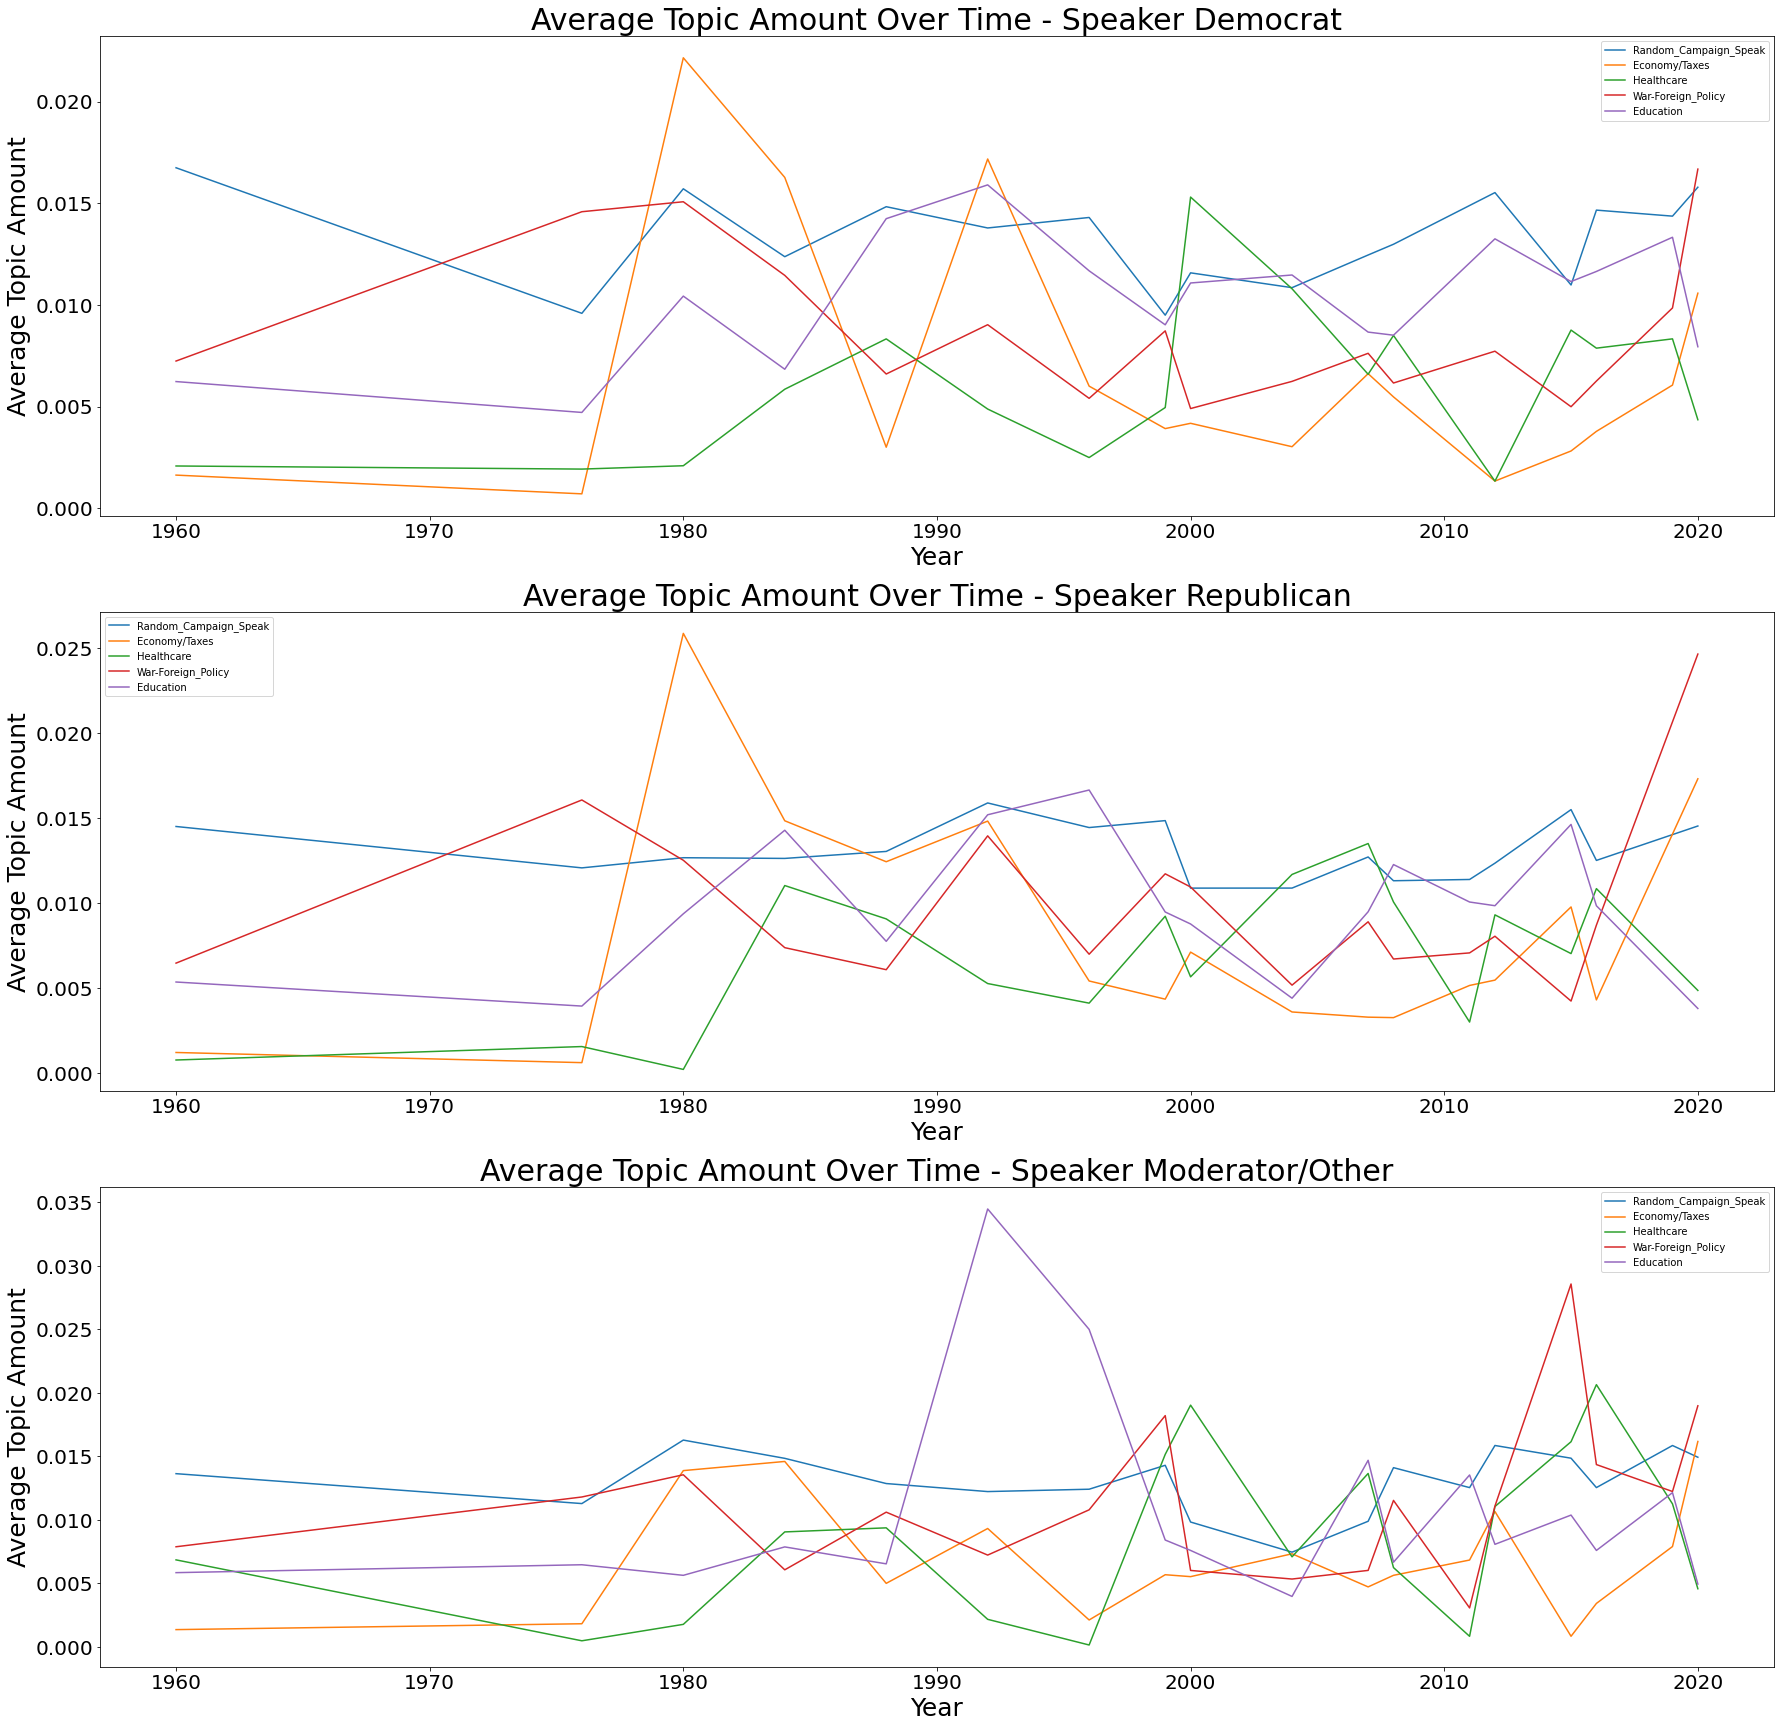

In [52]:
legend = []
plt.subplots(3, 1,figsize=(30,30))
for i, speaker_type in enumerate(types, 1):
    plt.subplot(3,1,i)
    counter = 2
    for topic in topics:
        legend.append(topic)
        x = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, 0]
        y = topics_over_time[topics_over_time.iloc[:, 1] == speaker_type].iloc[:, counter]
        legend.append(topic)
        plt.plot(x,y)
        counter += 1
    plt.xlabel('Year', size=25)
    plt.ylabel('Average Topic Amount', size=25)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title('Average Topic Amount Over Time - Speaker {}'.format(speaker_type), size=30)
    plt.legend(('Random_Campaign_Speak','Economy/Taxes', 'Healthcare', 'War-Foreign_Policy', 'Education'))

Topic Concentration, by Election Result (i.e. Winner/Loser)

## NMF TOPIC MODELING ON INDIVIDUAL PARTY PRIMARIES:

I'd like to see if different, more specific topics emerge from Republican and Democrat primaries.

# Republican Primaries:

In [385]:
rep_stop = ['policy','presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute', 'get', 'republican', 'people', 'party', 'got', 'get', 'issue', 'know', 'think', 'like', 'well', 'need', 'make', 'applause']

In [386]:
vectorizer = TfidfVectorizer(stop_words=rep_stop, max_df = 0.8)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [387]:
X = new_df[(new_df.line_length >= 30) & (new_df.Debate_Type =='Primary-Republican') & ((new_df.Speaker_Type =='Republican'))]['string']
tfi_model = vectorizer.fit_transform(X)

In [388]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [389]:
tf_term_document_matrix.shape

(3432, 9072)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [390]:
gop_nmf_model = NMF(6)

Topics from the relating model, for each line:

In [391]:
tf_doc_topic = gop_nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


(3432, 6)

Pulling the top 10 words for each of the k topics:

In [392]:
tf_words = vectorizer.get_feature_names()
tf = gop_nmf_model.components_.argsort(axis=1)[:,-1:-16:-1]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['would', 'state', 'united', 'war', 'world', 'military', 'iran', 'one', 'nuclear', 'go', 'take', 'say', 'weapon', 'could', 'force']


Topic 2:
['tax', 'cut', 'percent', 'income', 'code', 'plan', 'rate', 'pay', 'flat', 'money', 'rid', 'sale', 'fair', 'raise', 'corporate']


Topic 3:
['health', 'care', 'insurance', 'cost', 'saving', 'system', 'account', 'plan', 'medicare', 'let', 'buy', 'market', 'medical', 'patient', 'money']


Topic 4:
['job', 'work', 'economy', 'business', 'america', 'time', 'energy', 'world', 'create', 'million', 'sector', 'back', 'regulation', 'created', 'trade']


Topic 5:
['life', 'school', 'child', 'right', 'believe', 'pro', 'choice', 'education', 'law', 'parent', 'freedom', 'family', 'principle', 'respect', 'kid']


Topic 6:
['going', 'security', 'social', 'money', 'spending', 'say', 'border', 'thing', 'problem', 'back', 'come', 'one', 'washington', 'program', 'cut']




In [393]:
tf.shape

(6, 15)

# Democrat Primaries:

In [394]:
dem_stop = ['policy','presidential', 'vice', 'evening', 'debate', 'candidate', 'campaign', 'minute', 'get', 'democrat', 'people', 'party', 'got', 'get', 'issue', 'know', 'think', 'like', 'well', 'need', 'make', 'applause']

In [395]:
vectorizer = TfidfVectorizer(stop_words=dem_stop, max_df=0.7)

Note, more stop words were implemented in final_dataframe_cleanup.ipynb.

Since some responses can be very short (i.e. just a brief statement/quip), I am setting a minimum threshold of words for topic modelling.

In [396]:
X = new_df[(new_df.line_length >= 30) & (new_df.Debate_Type =='Primary-Democrat')&(new_df.Speaker_Type =='Democrat')]['string']
tfi_model = vectorizer.fit_transform(X)

In [397]:
tf_term_document_matrix = pd.DataFrame(tfi_model.toarray(), columns=vectorizer.get_feature_names())

In [398]:
tf_term_document_matrix.shape

(2952, 8445)

## Topic Modelling

After getthe the document set in terms of TF-IDF vectorization, below will try Topic Modelling using a few different tools.

### Topic Modelling via NMF:

In [399]:
dem_nmf_model = NMF(6)

Topics from the relating model, for each line:

In [400]:
tf_doc_topic = dem_nmf_model.fit_transform(tf_term_document_matrix)
tf_doc_topic.shape

/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/patrickbovard/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


(2952, 6)

Pulling the top 10 words for each of the k topics:

In [401]:
tf_words = vectorizer.get_feature_names()
tf = dem_nmf_model.components_.argsort(axis=1)[:,-1:-16:-1]
tf_topic_words = [[tf_words[e] for e in l] for l in tf]
for i, words in enumerate(tf_topic_words, 1):
    print('Topic {}:'.format(i))
    print(words)
    print('\n')

Topic 1:
['would', 'right', 'state', 'one', 'united', 'gun', 'time', 'bill', 'thing', 'woman', 'fact', 'year', 'senate', 'say', 'done']


Topic 2:
['health', 'care', 'insurance', 'plan', 'company', 'universal', 'medicare', 'system', 'cost', 'affordable', 'drug', 'million', 'coverage', 'profit', 'child']


Topic 3:
['school', 'college', 'education', 'child', 'kid', 'teacher', 'public', 'every', 'student', 'debt', 'free', 'go', 'year', 'tuition', 'community']


Topic 4:
['going', 'job', 'change', 'together', 'new', 'way', 'climate', 'world', 'bring', 'economy', 'energy', 'take', 'trade', 'sure', 'problem']


Topic 5:
['tax', 'pay', 'percent', 'income', 'class', 'middle', 'family', 'dollar', 'money', 'wealth', 'paying', 'cut', 'million', 'working', 'top']


Topic 6:
['war', 'iraq', 'troop', 'iran', 'military', 'combat', 'end', 'world', 'voted', 'afghanistan', 'home', 'security', 'nuclear', 'vote', 'weapon']




In [402]:
tf.shape

(6, 15)